<a href="https://colab.research.google.com/github/noashafir97/timfit/blob/master/exe1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)


2.7.0


In [3]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/deep learning/mission1/dataset (1).rar (Unzipped Files)/dataset/training_set',
                                                 target_size = (32, 32),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/deep learning/mission1/dataset (1).rar (Unzipped Files)/dataset/training_set',
                                                 target_size = (32, 32),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='validation')

Found 12003 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/deep learning/mission1/dataset (1).rar (Unzipped Files)/dataset/test_set',
                                            target_size = (32, 32),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2999 images belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:

cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 25)


Epoch 1/25
376/376 [==============================] - 1256s 3s/step - loss: 0.7240 - accuracy: 0.6770 - val_loss: 0.5710 - val_accuracy: 0.7583
Epoch 2/25
376/376 [==============================] - 49s 130ms/step - loss: 0.5797 - accuracy: 0.7560 - val_loss: 0.5124 - val_accuracy: 0.7817
Epoch 3/25
376/376 [==============================] - 47s 126ms/step - loss: 0.5317 - accuracy: 0.7753 - val_loss: 0.5288 - val_accuracy: 0.7797
Epoch 4/25
376/376 [==============================] - 48s 127ms/step - loss: 0.4936 - accuracy: 0.7961 - val_loss: 0.4362 - val_accuracy: 0.8230
Epoch 5/25
376/376 [==============================] - 48s 127ms/step - loss: 0.4596 - accuracy: 0.8146 - val_loss: 0.4520 - val_accuracy: 0.8080
Epoch 6/25
376/376 [==============================] - 49s 130ms/step - loss: 0.4311 - accuracy: 0.8230 - val_loss: 0.4746 - val_accuracy: 0.7973
Epoch 7/25
376/376 [==============================] - 49s 131ms/step - loss: 0.4267 - accuracy: 0.8284 - val_loss: 0.4086 - val_acc

In [20]:
cnn.evaluate(test_set)    

94/94 [==============================] - 593s 6s/step - loss: 0.3793 - accuracy: 0.8653


[0.3793190121650696, 0.8652884364128113]

In [22]:
def prediction_result(result):
  if result[0][0] >0:
    prediction = 'airplane'
  elif result[0][1] > 0:
    prediction = 'bird'
  elif result[0][2] > 0 :
    prediction = 'frog'
  print("predict class : " + prediction)

In [23]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/deep learning/mission1/dataset (1).rar (Unzipped Files)/dataset/test_set/bird/0124.jpg', target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
prediction_result(result)

predict class : bird


In [24]:
test_image = image.load_img('/content/drive/MyDrive/deep learning/mission1/dataset (1).rar (Unzipped Files)/dataset/test_set/airplane/0124.jpg', target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
prediction_result(result)

predict class : airplane


In [25]:
test_image = image.load_img('/content/drive/MyDrive/deep learning/mission1/dataset (1).rar (Unzipped Files)/dataset/test_set/frog/0124.jpg', target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
prediction_result(result)

predict class : frog


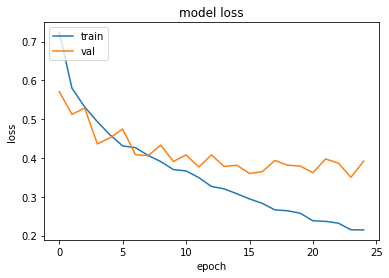

In [26]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

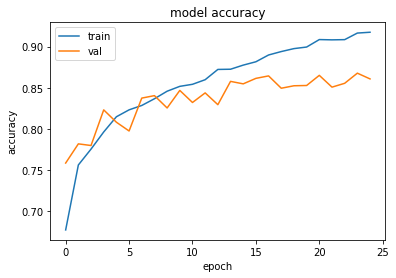

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()